# Assignment 2

### Submission Details
1. You will be uploading this python jupyter notebook file on eClass. Your file should be name assg2_studentID.ipynb. Please replace “studentID” in the file name with your own student ID.

2. Please first compelete the cell below:

In [37]:
# Name: Zoe Linga

# Email: lingazoe@gmail.com

# Student ID: 220610960

Note: this is important for the TAs grading your work, if you don't put in your name and student ID, it can be very difficult for them to determine whose submission this is.

3. Submissions are only accepted via eClass. Submissions sent to instructor or TAs will not be considered for grading.

### In this assignment, we will investigate one of my favorite obsessions. The NBA!

One of the most significant figures in the NBA is Stephen Curry – son of the famous Toronto Raptor player Dell Curry - whose efforts lead to the championship and final MVP award in the past season. while he is an outstanding player, there are talks that he is more than that and he managed to change the game of basketball with his courageous shooting attempts. So let’s see how data shows a correlation between his presence in the NBA and the dynamics of the league. Since we are already here, we do some other stuff alongside our objective.

## Part 1. Preprocessing the Data
We are going to work with players_stats_by_season_full_details.csv, the data includes player information on NBA (both regular season and playoffs) and international leagues per season starting from 1999-2000 season to 2019-2020 season. Fortunately, the variables are self-explanatory. We have 34 columns:

`League, Season, Season Stage, Player Name, Games Played, Total Minutes, Field Goal Mades, Field Goal Attempts, Three Pointer Mades, Three Pointer Attempts, Free Throw Mades, Free Throw Attempts, Turnovers, Personal Fauls, Offensive Rebounds, Defensive Rebounds, Total, Rebounds, Total Asists, Total Steals, Total Blocks, Total Points, Player Birth Year, Player Birth Month, Player Birth Date, Player Height in feet, Player Height in cm, Player Weight in lbs, Player Weight in kg, Player Nationality, Player High School, Player Draft Round, Player Draft Team`

Our objective is to analyze the NBA. We only consider the regular season because, in playoffs, teams do not follow the trends of the NBA. They adapt each other games through the series, and in if they win in the next series, everything, including playing types, shot selection, and so on, will change to be suitable for another series. In addition, the dataset did not provide per-game information. Since data is a little unbalanced within different seasons, using per-game stats would be way healthier anyway.

#### important note #1: you might need to add more cells or printings for each task! follow the instructions and complete all the requirements!
#### important note #2: For the case of answers that you need to type not code, please provide them as comments and DO NOT create new markdown cells (it would be hard for the grader to see them and you might lose marks)


For the **Part 1** I’d like you to do the following:

1. provide proper importations.
 
    

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Read the data from the .csv file and see the same columns and so on. Play with it and make yourself comfortable.

In [39]:
df = pd.read_csv('players_stats_by_season_full_details.csv', sep=',')

In [40]:
print(df.columns)

Index(['League', 'Season', 'Stage', 'Player', 'Team', 'GP', 'MIN', 'FGM',
       'FGA', '3PM', '3PA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'REB',
       'AST', 'STL', 'BLK', 'PTS', 'birth_year', 'birth_month', 'birth_date',
       'height', 'height_cm', 'weight', 'weight_kg', 'nationality',
       'high_school', 'draft_round', 'draft_pick', 'draft_team', 'PGG', 'MPG',
       'TOVPG', '3PAPG', 'FGAPG', 'FGMPG', 'FPG', '3PMPG'],
      dtype='object')


In [41]:
print((df['Team'] == 'TOR'))

0       False
1        True
2       False
3       False
4       False
        ...  
7628    False
7629    False
7630    False
7631    False
7632    False
Name: Team, Length: 7633, dtype: bool


3. add new columns including per game stats for example create `PPG` column using the two existing columns `PTS` and `GP`. You should do that for `MIN`, `TOV`, `3PA`, `FGA`, `FGM` and `PF` as well!
Suggested name for the new variables are `PPG`, `MPG`, `TOVPG`, `3PAPG`, `3PMPG`, `FGAPG`,`FGMPG`, `FPG`

In [42]:
df['PGG'] = df['PTS'] / df['GP']
df['MPG'] = df['MIN'] / df['GP']
df['TOVPG'] = df['TOV'] / df['GP']
df['3PAPG'] = df['3PA'] / df['GP']
df['3PMPG'] = df['3PM'] / df['GP']
df['FGAPG'] = df['FGA'] / df['GP']
df['FGMPG'] = df['FGM'] / df['GP']
df['FPG'] = df['PF'] / df['GP']

df.to_csv('players_stats_by_season_full_details.csv', index=False)

4. print out all the unique values of the leagues in the dataset

In [43]:
print(df)

     League       Season           Stage            Player Team  GP     MIN  \
0       NBA  1999 - 2000  Regular_Season  Shaquille O'Neal  LAL  79  3163.0   
1       NBA  1999 - 2000  Regular_Season      Vince Carter  TOR  82  3126.0   
2       NBA  1999 - 2000  Regular_Season       Karl Malone  UTA  82  2947.0   
3       NBA  1999 - 2000  Regular_Season     Allen Iverson  PHI  70  2853.0   
4       NBA  1999 - 2000  Regular_Season       Gary Payton  SEA  82  3425.0   
...     ...          ...             ...               ...  ...  ..     ...   
7628    NBA  2019 - 2020        Playoffs     Wesley Iwundu  ORL   5    75.8   
7629    NBA  2019 - 2020        Playoffs      Semi Ojeleye  BOS  13   122.2   
7630    NBA  2019 - 2020        Playoffs        J.R. Smith  LAL  10    74.9   
7631    NBA  2019 - 2020        Playoffs      Juwan Morgan  UTA   7    86.5   
7632    NBA  2019 - 2020        Playoffs  Matisse Thybulle  PHI   4    75.3   

      FGM   FGA  3PM  ...  draft_pick             d

5. Filter the df so that we have a data of only NBA:

In [44]:
df[df['League'] == 'NBA']

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,draft_pick,draft_team,PGG,MPG,TOVPG,3PAPG,FGAPG,FGMPG,FPG,3PMPG
0,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79,3163.0,956,1665,0,...,1.0,Orlando Magic,29.670886,40.037975,2.822785,0.012658,21.075949,12.101266,3.227848,0.000000
1,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,82,3126.0,788,1696,95,...,5.0,Golden State Warriors,25.695122,38.121951,2.170732,2.878049,20.682927,9.609756,3.207317,1.158537
2,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,82,2947.0,752,1476,2,...,13.0,Utah Jazz,25.548780,35.939024,2.817073,0.097561,18.000000,9.170732,2.792683,0.024390
3,NBA,1999 - 2000,Regular_Season,Allen Iverson,PHI,70,2853.0,729,1733,89,...,1.0,Philadelphia Sixers,28.414286,40.757143,3.285714,3.728571,24.757143,10.414286,2.314286,1.271429
4,NBA,1999 - 2000,Regular_Season,Gary Payton,SEA,82,3425.0,747,1666,177,...,2.0,Seattle SuperSonics,24.170732,41.768293,2.731707,6.341463,20.317073,9.109756,2.170732,2.158537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7628,NBA,2019 - 2020,Playoffs,Wesley Iwundu,ORL,5,75.8,6,20,4,...,3.0,Orlando Magic,4.200000,15.160000,0.600000,1.400000,4.000000,1.200000,1.000000,0.800000
7629,NBA,2019 - 2020,Playoffs,Semi Ojeleye,BOS,13,122.2,7,28,5,...,7.0,Boston Celtics,1.615385,9.400000,0.076923,1.769231,2.153846,0.538462,0.692308,0.384615
7630,NBA,2019 - 2020,Playoffs,J.R. Smith,LAL,10,74.9,7,26,6,...,18.0,New Orleans Pelicans,2.000000,7.490000,0.700000,2.200000,2.600000,0.700000,1.100000,0.600000
7631,NBA,2019 - 2020,Playoffs,Juwan Morgan,UTA,7,86.5,3,12,2,...,NaN,NaN,1.428571,12.357143,0.142857,1.428571,1.714286,0.428571,1.571429,0.285714


*True Shooting Percentage (TS%)* is a statistic used in basketball to measure a player's efficiency at shooting the ball. It considers field goals, 3-point field goals, and free throws, providing a comprehensive view of a player's shooting performance. Unlike traditional shooting percentages that only consider field goals, TS% includes the impact of 3-pointers and the effectiveness at the free-throw line. This makes it a valuable metric for evaluating the true scoring efficiency of players.

Formula:
$$\text{TS\%} = \frac{\text{Points}}{2 \times (\text{Field Goal Attempts} + 0.44 \times \text{Free Throw Attempts})}$$

Calculate the True Shooting Percentage (TS%) for each NBA player per season, focusing specifically on those with at least 1000 combined field goal and free throw attempts in a season. This threshold ensures that the evaluation is restricted to players who have a significant shooting volume, thus providing a reliable measure of shooting efficiency.

Instructions:

 1. Aggregate the data for each `Player` for each `Season` to sum up the total points (PTS), field goal attempts (FGA), and free throw attempts (FTA).
 2. Implement and apply a function to calculate TS%, considering only those player-season records that meet the attempt threshold.
 3. Sort the results to identify the top players based on their TS% and display these top results.

In [45]:
grouped_data = df.groupby(['Player', 'Season']).agg({'PTS': 'sum', 'FGA': 'sum', 'FTA': 'sum'})

grouped_data = grouped_data.reset_index()

print(grouped_data.columns)

def calc_ts(row):
    if (row['FGA'] + row['FTA']) >= 1000:
        try:
            denominator = 2 * (row['FGA'] + (row['FTA'] * 0.44))
            return row['PTS'] / denominator
        except ZeroDivisionError:
            return None
    else:
        return None

grouped_data['TS%'] = grouped_data.apply(calc_ts, axis=1)
top_s = grouped_data.sort_values(by='TS%', ascending=False)

print(top_s)

Index(['Player', 'Season', 'PTS', 'FGA', 'FTA'], dtype='object')
                  Player       Season   PTS   FGA  FTA       TS%
4234         Rudy Gobert  2019 - 2020  1144   631  445  0.691824
4233         Rudy Gobert  2018 - 2019  1340   744  545  0.681033
4231         Rudy Gobert  2016 - 2017  1241   688  526  0.674867
1177      DeAndre Jordan  2016 - 2017  1137   638  481  0.669107
4493       Stephen Curry  2015 - 2016  2827  1936  483  0.657895
...                  ...          ...   ...   ...  ...       ...
5112       Zaza Pachulia  2017 - 2018   373   264   93       NaN
5113       Zaza Pachulia  2018 - 2019   267   193  124       NaN
5114      Zeljko Rebraca  2001 - 2002   534   385  189       NaN
5122  Zydrunas Ilgauskas  2009 - 2010   486   451  104       NaN
5123  Zydrunas Ilgauskas  2010 - 2011   392   349   52       NaN

[5124 rows x 6 columns]


6. Now let’s deal with some missing values. Impute the `NaN` values in `birth_year`, `weight_kg` and `heigh_cm` columns using the `mean()` of all the data in that column.

In [72]:
df['birth_year'].fillna(df['birth_year'].mean(), inplace=True)
df['weight_kg'].fillna(df['weight_kg'].mean(), inplace=True)
df['height_cm'].fillna(df['height_cm'].mean(), inplace=True)

/var/folders/f7/jjqsd44138l1y_f5llpd7str0000gn/T/ipykernel_1176/3164944373.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['birth_year'].fillna(df['birth_year'].mean(), inplace=True)
/var/folders/f7/jjqsd44138l1y_f5llpd7str0000gn/T/ipykernel_1176/3164944373.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

7. Now let’s create an age column you can do that using apply with the following function
```
    def calculate_age(row):
    # Extract the starting year of the season and subtract the birth year
    try:
        season_start_year = int(row['Season'][0:4])  # Takes the first four characters and converts to integer
        birth_year = int(row['birth_year'])
        return season_start_year - birth_year
    except ValueError:
        return None  # Return None or a suitable value if there's an error
```

In [47]:
def calculate_age(row):
    try:
        season_start_year = int(row['season'][0:4])
        birth_year = int(row['birth_year'])
        return season_start_year - birth_year
    except ValueError:
        return None

8. Also drop the 'birth_year' we don’t need it anymore.

In [48]:
df.drop('birth_year', axis=1)

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,draft_pick,draft_team,PGG,MPG,TOVPG,3PAPG,FGAPG,FGMPG,FPG,3PMPG
0,NBA,1999 - 2000,Regular_Season,Shaquille O'Neal,LAL,79,3163.0,956,1665,0,...,1.0,Orlando Magic,29.670886,40.037975,2.822785,0.012658,21.075949,12.101266,3.227848,0.000000
1,NBA,1999 - 2000,Regular_Season,Vince Carter,TOR,82,3126.0,788,1696,95,...,5.0,Golden State Warriors,25.695122,38.121951,2.170732,2.878049,20.682927,9.609756,3.207317,1.158537
2,NBA,1999 - 2000,Regular_Season,Karl Malone,UTA,82,2947.0,752,1476,2,...,13.0,Utah Jazz,25.548780,35.939024,2.817073,0.097561,18.000000,9.170732,2.792683,0.024390
3,NBA,1999 - 2000,Regular_Season,Allen Iverson,PHI,70,2853.0,729,1733,89,...,1.0,Philadelphia Sixers,28.414286,40.757143,3.285714,3.728571,24.757143,10.414286,2.314286,1.271429
4,NBA,1999 - 2000,Regular_Season,Gary Payton,SEA,82,3425.0,747,1666,177,...,2.0,Seattle SuperSonics,24.170732,41.768293,2.731707,6.341463,20.317073,9.109756,2.170732,2.158537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7628,NBA,2019 - 2020,Playoffs,Wesley Iwundu,ORL,5,75.8,6,20,4,...,3.0,Orlando Magic,4.200000,15.160000,0.600000,1.400000,4.000000,1.200000,1.000000,0.800000
7629,NBA,2019 - 2020,Playoffs,Semi Ojeleye,BOS,13,122.2,7,28,5,...,7.0,Boston Celtics,1.615385,9.400000,0.076923,1.769231,2.153846,0.538462,0.692308,0.384615
7630,NBA,2019 - 2020,Playoffs,J.R. Smith,LAL,10,74.9,7,26,6,...,18.0,New Orleans Pelicans,2.000000,7.490000,0.700000,2.200000,2.600000,0.700000,1.100000,0.600000
7631,NBA,2019 - 2020,Playoffs,Juwan Morgan,UTA,7,86.5,3,12,2,...,NaN,NaN,1.428571,12.357143,0.142857,1.428571,1.714286,0.428571,1.571429,0.285714


9. Extract just NBA regular season from the data and update your data frame with extracted data. As we said, we don’t need the rest of it!. (Hint: remember how we extracted wines from specific countries in the class? `loc` command can be very useful!)

In [49]:
df = df.loc[df['League'] == 'NBA']


## Part 2. General NBA analysis!

Now let’s perform the first set of analysis. Before we go on about the game stats let’s see how general trends such as weights, age, minutes played per game, etc., has changed. for the __Part 2__:


Before we dive into the details of Stephen Curry’s remarkable shooting skills, let's explore who the best shooters in the NBA are by using an advanced metric called True Shooting Percentage (TS%). This statistic provides a more accurate measure of a player's efficiency by considering all forms of scoring from the field, making it ideal for comparing players across different eras and styles.

**True Shooting Percentage (TS%)** is a statistic used in basketball to measure a player's efficiency at shooting the ball. It considers field goals, 3-point field goals, and free throws, providing a comprehensive view of a player's shooting performance. Unlike traditional shooting percentages that only consider field goals, TS% includes the impact of 3-pointers and the effectiveness at the free-throw line. This makes it a valuable metric for evaluating the true scoring efficiency of players.

Formula:
$$\text{TS\%} = \frac{\text{Points}}{2 \times (\text{Field Goal Attempts} + 0.44 \times \text{Free Throw Attempts})}$$

Calculate the True Shooting Percentage (TS%) for each NBA player per season, focusing specifically on those with at least 1000 combined field goal and free throw attempts in a season. This threshold ensures that the evaluation is restricted to players who have a significant shooting volume, thus providing a reliable measure of shooting efficiency.

Instructions:

1. **Aggregate Player Data:** Group the player data by 'Player' and 'Season'. Summarize the total points (PTS), field goal attempts (FGA), and free throw attempts (FTA) for each player-season combination.
2. **Calculate TS%:** Implement a function to calculate TS%, but ensure it only processes records where the combined total of FGA and FTA meets or exceeds 1000. This filter excludes players with insufficient shooting volume, which might otherwise skew the analysis. Consider cases where the calculated denominator might be zero and handle these appropriately to avoid division errors. 
* Utilize the apply() function to compute the True Shooting Percentage and store your results in a new DataFrame named player_season_stats. Ensure your calculations are based on original columns eg. field goal attempts (FGA), not field goal attempts per game (FGAPG). The final DataFrame should include the following columns: Player, Season, PTS, FGA, FTA, and TS%
3. **Sort and Display Results:** Sort the resulting data by TS% in descending order to find the top shooters. Display the top 10 players to see who leads in shooting efficiency.

In [50]:
grouped_data = df.groupby(['Player', 'Season']).agg({'PTS': 'sum', 'FGA': 'sum', 'FTA': 'sum'})

grouped_data = grouped_data.reset_index()

print(grouped_data.columns)

def calc_ts(row):
    if (row['FGA'] + row['FTA']) >= 1000:
        try:
            denominator = 2 * (row['FGA'] + (row['FTA'] * 0.44))
            return row['PTS'] / denominator
        except ZeroDivisionError:
            return None
    else:
        return None

grouped_data['TS%'] = grouped_data.apply(calc_ts, axis=1)
top_s = grouped_data.sort_values(by='TS%', ascending=False)

print(top_s)
print(grouped_data[grouped_data['Player'] == 'Stephen Curry'])


Index(['Player', 'Season', 'PTS', 'FGA', 'FTA'], dtype='object')
                  Player       Season   PTS   FGA  FTA       TS%
4234         Rudy Gobert  2019 - 2020  1144   631  445  0.691824
4233         Rudy Gobert  2018 - 2019  1340   744  545  0.681033
4231         Rudy Gobert  2016 - 2017  1241   688  526  0.674867
1177      DeAndre Jordan  2016 - 2017  1137   638  481  0.669107
4493       Stephen Curry  2015 - 2016  2827  1936  483  0.657895
...                  ...          ...   ...   ...  ...       ...
5112       Zaza Pachulia  2017 - 2018   373   264   93       NaN
5113       Zaza Pachulia  2018 - 2019   267   193  124       NaN
5114      Zeljko Rebraca  2001 - 2002   534   385  189       NaN
5122  Zydrunas Ilgauskas  2009 - 2010   486   451  104       NaN
5123  Zydrunas Ilgauskas  2010 - 2011   392   349   52       NaN

[5124 rows x 6 columns]
             Player       Season   PTS   FGA  FTA       TS%
4488  Stephen Curry  2009 - 2010  1399  1143  200  0.568237
4489  Step

**Question:** After calculating TS%, which players emerge as the most efficient high-volume shooters?

In [51]:
#Answer: Rudy Gobert

**Question:** How does Stephen Curry compare to these top performers in terms of TS%?

In [52]:
#Answer: Stephen Curry Compares exceptionally at 5th place

* Create two new DataFrames from the original DataFrame. Name one of them BC (Before Curry) and AC. Steph started his career on 2009-2010 season. So 1999-2000 up to 2008-2009 should in BC and the rest in AC (again `loc` is a very useful command!)

In [91]:
BC = df.loc[(df.Season == '1999 - 2000') | (df.Season == '2000 - 2001') |
            (df.Season == '2001 - 2002') | (df.Season == '2002 - 2003') |
            (df.Season == '2003 - 2004') | (df.Season == '2004 - 2005') |
            (df.Season == '2005 - 2006') | (df.Season == '2006 - 2007') |
            (df.Season == '2007 - 2008') | (df.Season == '2008 - 2009') ]

AC = df.loc[(df.Season == '2009 - 2010') | (df.Season == '2010 - 2011') | 
            (df.Season == '2011 - 2012') | (df.Season == '2012 - 2013') |
            (df.Season == '2013 - 2014') | (df.Season == '2014 - 2015') |
            (df.Season == '2015 - 2016') | (df.Season == '2016 - 2017') |
            (df.Season == '2017 - 2018') | (df.Season == '2018 - 2019') |
            (df.Season == '2019 - 2020')]

* We know that basketball is a physical game, heights, weights and age are of course important. So let’s see if there is a change in distribution of **heights**, **weights** and **age** in BC and AC. Use the matplotlib or seaborn to plot both groups (BC and AC) in the same diagram for these 3 parameters. The output for heights (If you chose seaborn) should look like this:

!['output1.png'](output1.png)

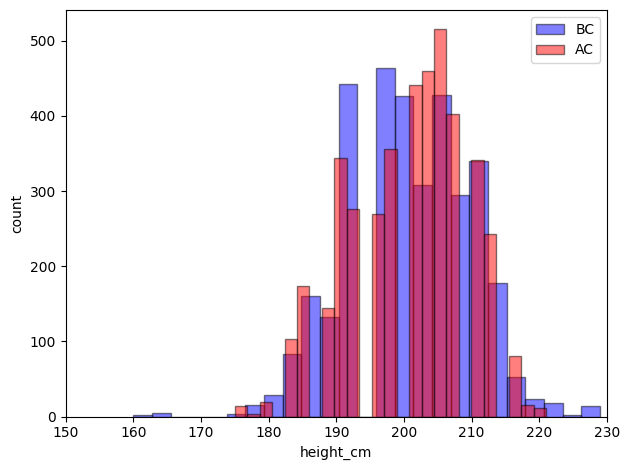

In [140]:
plt.figure()
plt.hist(BC['height_cm'],  bins=25, label='BC', alpha = 0.5, color='blue', edgecolor='black')
plt.hist(AC['height_cm'], bins=25, label='AC', alpha = 0.5, color='red', edgecolor='black')

plt.xlabel('height_cm')
plt.ylabel('count')
plt.xlim(150, 230)

plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


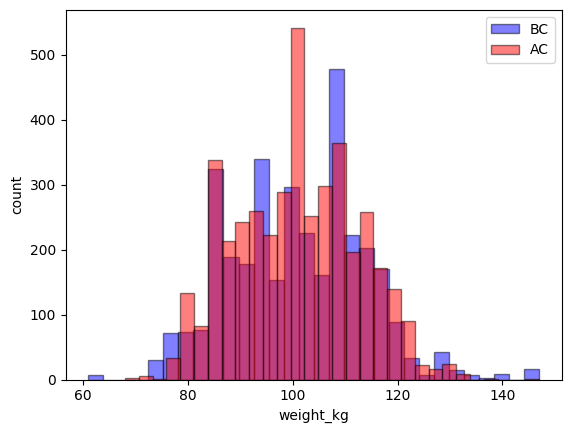

In [141]:
plt.figure()
plt.hist(BC['weight_kg'], label='BC', bins=30, alpha = 0.5, color='blue', edgecolor='black')
plt.hist(AC['weight_kg'], label='AC', bins=30, alpha = 0.5, color='red', edgecolor='black')

plt.xlabel('weight_kg')
plt.ylabel('count')
plt.legend()
plt.grid(False)
plt.show()

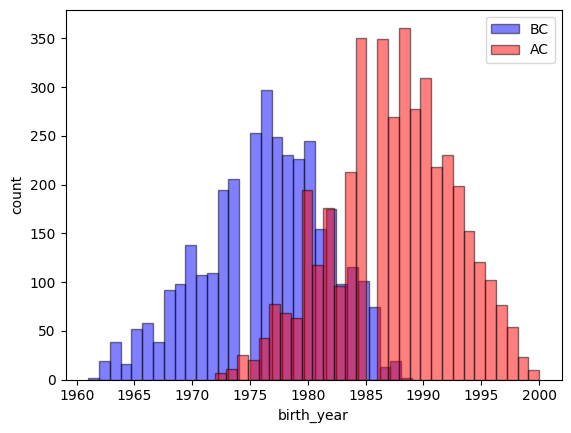

In [119]:
plt.figure()
plt.hist(BC['birth_year'], label='BC', bins=30, alpha = 0.5, color='blue', edgecolor='black')
plt.hist(AC['birth_year'], label='AC', bins=30, alpha = 0.5, color='red', edgecolor='black')

plt.xlabel('birth_year')
plt.ylabel('count')
plt.legend()
plt.grid(False)
plt.show()

* Do you see any significant difference?

In [57]:
#Answer There is a big difference for BC and AC for birth year, as AC are younger and BC are older. Additionally,
# the weight tends to be high in the middle for AC than BC.

* Physical fitness has been improved in the recent years as well. Franchises put a lot of money in making their player resistant to injury and ready for the the longer games. So let’s see the number of games played by a player and minutes played per game for these two categories. (create plots similar to the question 2 of this part)

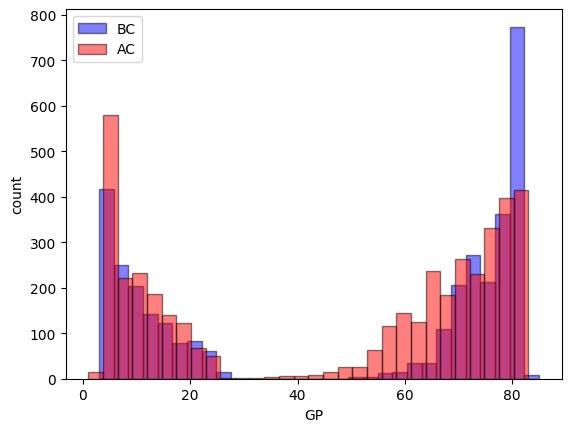

In [122]:
plt.figure()
plt.hist(BC['GP'], label='BC', bins=30, alpha = 0.5, color='blue',edgecolor='black')
plt.hist(AC['GP'], label='AC', bins=30, alpha = 0.5, color='red',edgecolor='black')

plt.xlabel('GP')
plt.ylabel('count')
plt.legend()
plt.grid(False)
plt.show()

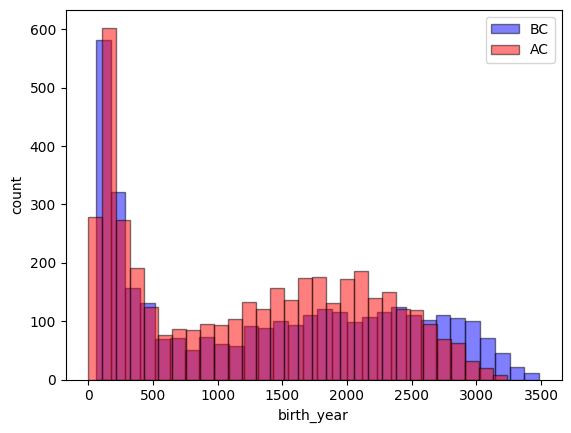

In [123]:
plt.figure()
plt.hist(BC['MIN'], label='BC', bins=30, alpha = 0.5, color='blue', edgecolor='black')
plt.hist(AC['MIN'], label='AC', bins=30, alpha = 0.5, color='red', edgecolor='black')

plt.xlabel('birth_year')
plt.ylabel('count')
plt.legend()
plt.grid(False)
plt.show()

5.	Do you see any difference? Is that surprising? Are the oldies right when they say today’s league is for softies?

In [60]:
# There is little difference between BC and AC for GP and MIN (and they may be right).

## Part 3. Analysis of The Game:

1. What is Steph is known for? His 3-pointers. So let’s start by them. Create a density plot like before, but this time use a shared axis for two variables 3-pointer attempts and makes. You should use the subplots command to make it happen. The output should look like this:

![output2.png](output2.png)

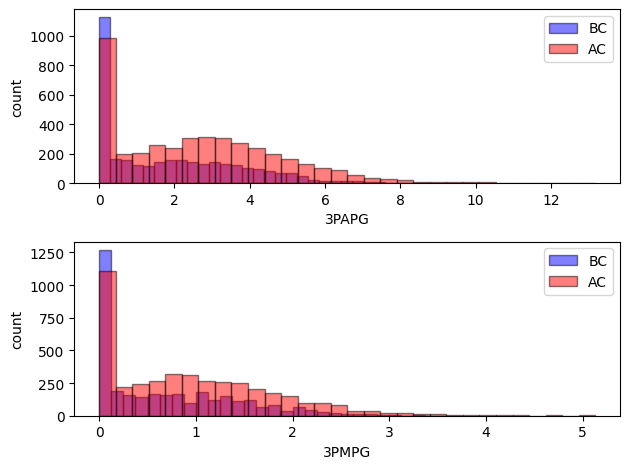

In [125]:
fig, ax = plt.subplots(2, 1)

ax[0].hist(BC['3PAPG'], label='BC', bins=30, alpha = 0.5, color='blue', edgecolor='black')
ax[0].hist(AC['3PAPG'], label='AC', bins=30, alpha = 0.5, color='red', edgecolor='black')
ax[0].set_xlabel('3PAPG')
ax[0].set_ylabel('count')
ax[0].grid(False)
ax[0].legend()

ax[1].hist(BC['3PMPG'], label='BC', bins=30, alpha = 0.5, color='blue', edgecolor='black')
ax[1].hist(AC['3PMPG'], label='AC', bins=30, alpha = 0.5, color='red', edgecolor='black')
ax[1].set_xlabel('3PMPG')
ax[1].set_ylabel('count')
ax[1].grid(False)
ax[1].legend()


plt.tight_layout()
plt.show()

2. It seems that the distribution has not significantly changed. Huh? But let’s be more concrete. To understand whether the frequency of 3-point attempts per game (3PAPG) has changed significantly in the NBA before and after Stephen Curry (denoted as BC and AC), we can use a statistical test called the t-test.

**What is a t-test?**
The t-test helps determine if the differences between two groups' means are statistically significant. It’s a common method in statistics to compare two populations or conditions.

Let's perform a t-test to determine if there are significant changes in the 3PAPG due to Stephen Curry’s impact.

To carry out the independent t-test, import the ttest_ind function from the scipy.stats module.

In [62]:
from scipy.stats import ttest_ind, false_discovery_control

ttest_ind(BC.loc[:,'3PAPG'], AC.loc[:,'3PAPG'], equal_var=False)

TtestResult(statistic=np.float64(-16.857751686119062), pvalue=np.float64(1.2446112626643383e-62), df=np.float64(7617.824862726418))

two values will be returned by this function. The second one is important for us. It is called **p-value** If it is more than 0.05 it means that there is *NOT* statistically significant difference between the means of these two distributions and the changes we observed are due to randomness otherwise it means that the difference is real. the league has been changed

Repeat the earlier steps to examine the distributions of Turnovers Per Game (`TOVPG`) and Fouls Per Game (`FPG`). This time, visualize both metrics in a single plot for both before Curry (BC) and after Curry (AC). Then, calculate the **p-value** for both metrics to assess any significant differences. (write you assessment as comment)

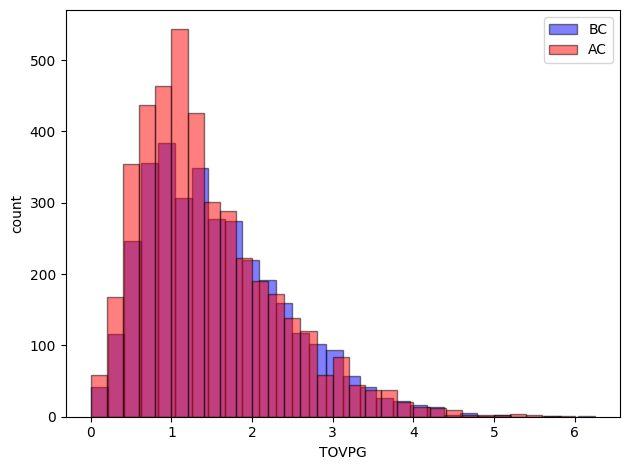

In [127]:
plt.figure()
plt.hist(BC['TOVPG'], label='BC', bins=30, alpha = 0.5, color='blue', edgecolor='black')
plt.hist(AC['TOVPG'], label='AC', bins=30, alpha = 0.5, color='red', edgecolor='black')
plt.xlabel('TOVPG')
plt.ylabel('count')
plt.grid(False)
plt.tight_layout()
plt.legend()




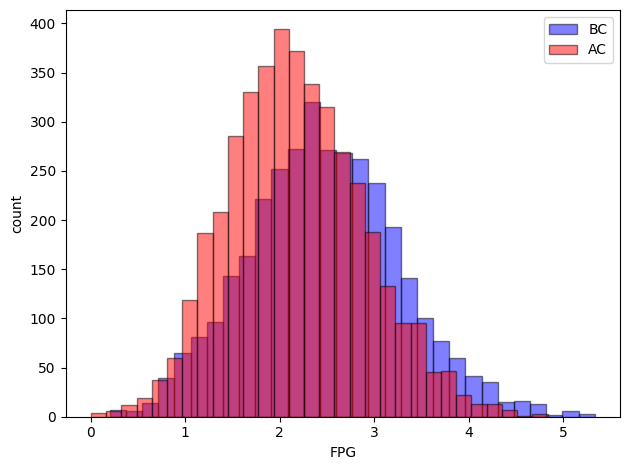

In [129]:
plt.figure()
plt.hist(BC['FPG'], label='BC',bins=30,  alpha = 0.5, color='blue', edgecolor='black')
plt.hist(AC['FPG'], label='AC', bins=30, alpha = 0.5, color='red', edgecolor='black')

plt.xlabel('FPG')
plt.ylabel('count')
plt.legend()
plt.tight_layout()
plt.grid(False)

In [65]:
#Assesment: No sigificant difference

In [66]:
ttest_ind(BC.loc[:,'TOVPG'], AC.loc[:,'TOVPG'], equal_var=False)

TtestResult(statistic=np.float64(5.833969108896854), pvalue=np.float64(5.643483553830652e-09), df=np.float64(7307.013017223767))

In [67]:
ttest_ind(BC.loc[:,'FPG'], AC.loc[:,'FPG'], equal_var=False)

TtestResult(statistic=np.float64(16.64381375198421), pvalue=np.float64(5.051034161396525e-61), df=np.float64(6942.293022258751))

In [68]:
#Assesment: pvalue for tovpg is 5.643483553830652e-09 and pvalue for fpg is 5.051034161396525e-61

4. Does Steph changed the game? Are you surprised?

In [69]:
# he does change the game, not really surprised

## Part 4: In praise of Stephen Curry!

Well, Steph is a great player!

1. Extract his information and save it in a new data frame called Steph (Dictation note: his name in the player column is “Stephen Curry”, and its case sensitive)

In [70]:
steph = df.loc[df['Player'] == 'Stephen Curry']

2. Create two scatter plots, one with x-axis for `3PMPG` and y-axis `3PAPG` and the other with `FGMPG` and `FGAPG` (these are for field goals) with the information of all other players along with curry (so 1 big plot with 2 subplots, each subplot has two inputs to plot, one from AC and the other from Steph data frame). The output should be like this:
![output3.png](output3.png)

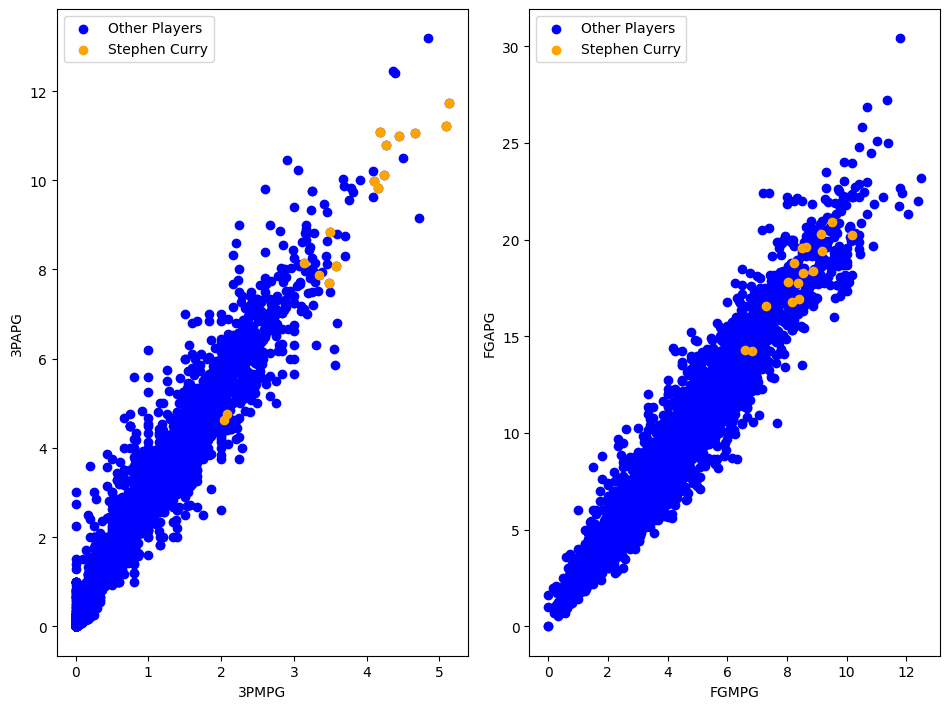

In [130]:
fig, ax = plt.subplots(1, 2, figsize=(9.6, 7.2))

ax[0].scatter(AC['3PMPG'], AC['3PAPG'], label='Other Players', color='blue')
ax[0].scatter(steph['3PMPG'], steph['3PAPG'], label='Stephen Curry', color='orange')
ax[0].set_xlabel('3PMPG')
ax[0].set_ylabel('3PAPG')
ax[0].grid(False)
ax[0].legend()

ax[1].scatter(AC['FGMPG'], AC['FGAPG'], label='Other Players', color='blue')
ax[1].scatter(steph['FGMPG'], steph['FGAPG'], label='Stephen Curry', color='orange')
ax[1].set_xlabel('FGMPG')
ax[1].set_ylabel('FGAPG')
ax[1].grid(False)
ax[1].legend()

plt.tight_layout()
plt.show()


In these plots we can see how efficient Steph is! Except some minor average performance (for his rookie years) he is an absolute statistical outlier in the NBA in comparison with other players ever played the game!

### Statistical Significance vs. Causality in NBA Analytics

When analyzing the impact of Stephen Curry on NBA game statistics before and after his prominence, it's crucial to distinguish between **statistical significance** and **causality**.

#### Statistical Significance
Statistical significance informs us that an observed effect, such as changes in game statistics (e.g., frequency of three-point attempts per game or 3PAPG), is unlikely due to sampling error. For example, a low p-value from our t-tests suggests significant shifts in basketball metrics coinciding with Curry’s era, implying these changes are not just random fluctuations.

#### The Limitation: Statistical Significance Does Not Imply Causality
Causality implies a cause-effect relationship, where one event is the direct result of the occurrence of the other event. Establishing causality requires not only observing a significant effect but also demonstrating that this effect happens as a direct result of the variable in question (Stephen Curry's influence) while ruling out other possible factors.

##### Why Causality May Not Be Inferred:
1. **Confounding Variables**: There are likely numerous other factors that contribute to changes in NBA gameplay statistics, such as changes in coaching strategies, improvement in player skills across the league, rule changes by the NBA, and the emergence of other influential players.
   
2. **Temporal Precedence**: While Stephen Curry’s active years correlate with increased three-point attempts, correlation does not confirm which variable precedes the other. Increases in 3PAPG might have influenced coaching strategies to recruit players similar to Curry, thus increasing the overall metric independently of Curry himself.

3. **Bidirectional Influence**: It's possible that not only may Curry have influenced the NBA’s shift in playing style, but also the evolving strategies and player developments could have influenced how Curry played.

#### Proper Approach to Discussing Results:
When presenting results that show a statistical correlation or difference, it's essential to clarify that these findings do not establish a direct cause-and-effect relationship without further experimental or longitudinal data to support such claims. Acknowledge the possibility that while Stephen Curry’s era marks a significant statistical change in certain aspects of the game, asserting that his presence alone caused these changes would require a more in-depth, controlled analysis that accounts for multiple external factors.

#### Conclusion
In summary, while statistical analysis can identify significant trends and differences in data, asserting causality from such findings requires a careful consideration of other influencing factors and often, a more rigorous experimental setup. In sports analytics, as in many fields, distinguishing between correlation and causation helps maintain the integrity of conclusions drawn from the data and informs more accurate and responsible discussions about player impact and game strategy evolution.
